In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# use this to hide the red warning boxes
# Only use once you know they aren't significant
import warnings
warnings.filterwarnings('ignore')

# PCA - predict ethnicity using 1kGP/HapMap data

For burden testing to provide accurate results, it is important that the input data comes from a genetically homogeneous population. In practice, this means that all samples should be from a similar ancestry/ethnicity. In the case of DDD data, using patients recruited in the UK, this is most likely to be samples of European ancestry. Unfortunately, this information is not recorded in the data which are available to us.

PCA (Principal component analysis) allows multidimensional data to be reduced into a small number of prinicipal components, **(?? how should these actually the described ??)**. These components can be plotted, and can indicated which samples are most similar by how the cluster together. This method is often used to separate samples by ethnicity **(ref)**. Commonly, data from the 1 thousand genomes project is used as a set of samples with known ancestry, against which the test samples are projected in order to predict their ethnic origin. 1kGP data is used as it is publically available, covers a global range of ethnicities, and has been well characterised and used for similar purposes in previous studies.

The 1kGP data has both a continent level "superpopulation" classficiation, and a more detailed country or ethnic group classification. Both are useful, for example assuring that all regional subpopulations cluster with the others from the relevant superpopulation as a quality control check, but the superpopulation data is clearer to show on a plot.

## PCA analysis
This has been performed on the data stored on Iridis.

**TODO:** summarise the process and relevant scripts here

Both DDD and 1kGP data were analysed using the same set of variants and the same scripts, so the results can be directly compared.

In [2]:
# Load ethnicity data
# This includes the DDD and 1kGP phase 1 samples
ethnicity = pd.read_csv("Data/FINAL.DDD-phase1-data.trimmed.tsv", sep="\t", names=["ID", "SUPERPOP", "POPULATION"], index_col="ID")

# Load the PCA data (from plink eigenvalues file, with only the first 2 prinicpal components)
# TODO: Check the eigenvectors file, which I think shows how much variation each principal component explains.
#pca = pd.read_csv("Data/PLINK.DDD-and-1KGP-phase1.pca.plot", sep="\t", names=["ID", "PC1", "PC2"], index_col="ID")
pca = pd.read_csv("Data/PLINK.pca.eigenvec", sep=" ", names=["ID", "ID2", "PC1", "PC2", "PC3", "PC4",
                                                              "PC5", "PC6", "PC7", "PC8", "PC9", "PC10",
                                                              "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", 
                                                              "PC17", "PC18", "PC19", "PC20" ], index_col="ID")


# Join the two datafromes (sample ID is the index column for both, so the join will be on this value)
# Now we have both the PCA values and the ethnicity for all samples.
joint = pca.join(ethnicity, rsuffix="dup")

In [3]:
# Set up some colour palettes
phase1_superpops = ["EAS", "EUR", "AFR", "AMR", "UNK"]
phase1_pop_palette = {"EAS": "mediumseagreen", "EUR": "darkviolet", "AFR": "coral",
                      "AMR": "dodgerblue", "UNK": "yellow"}

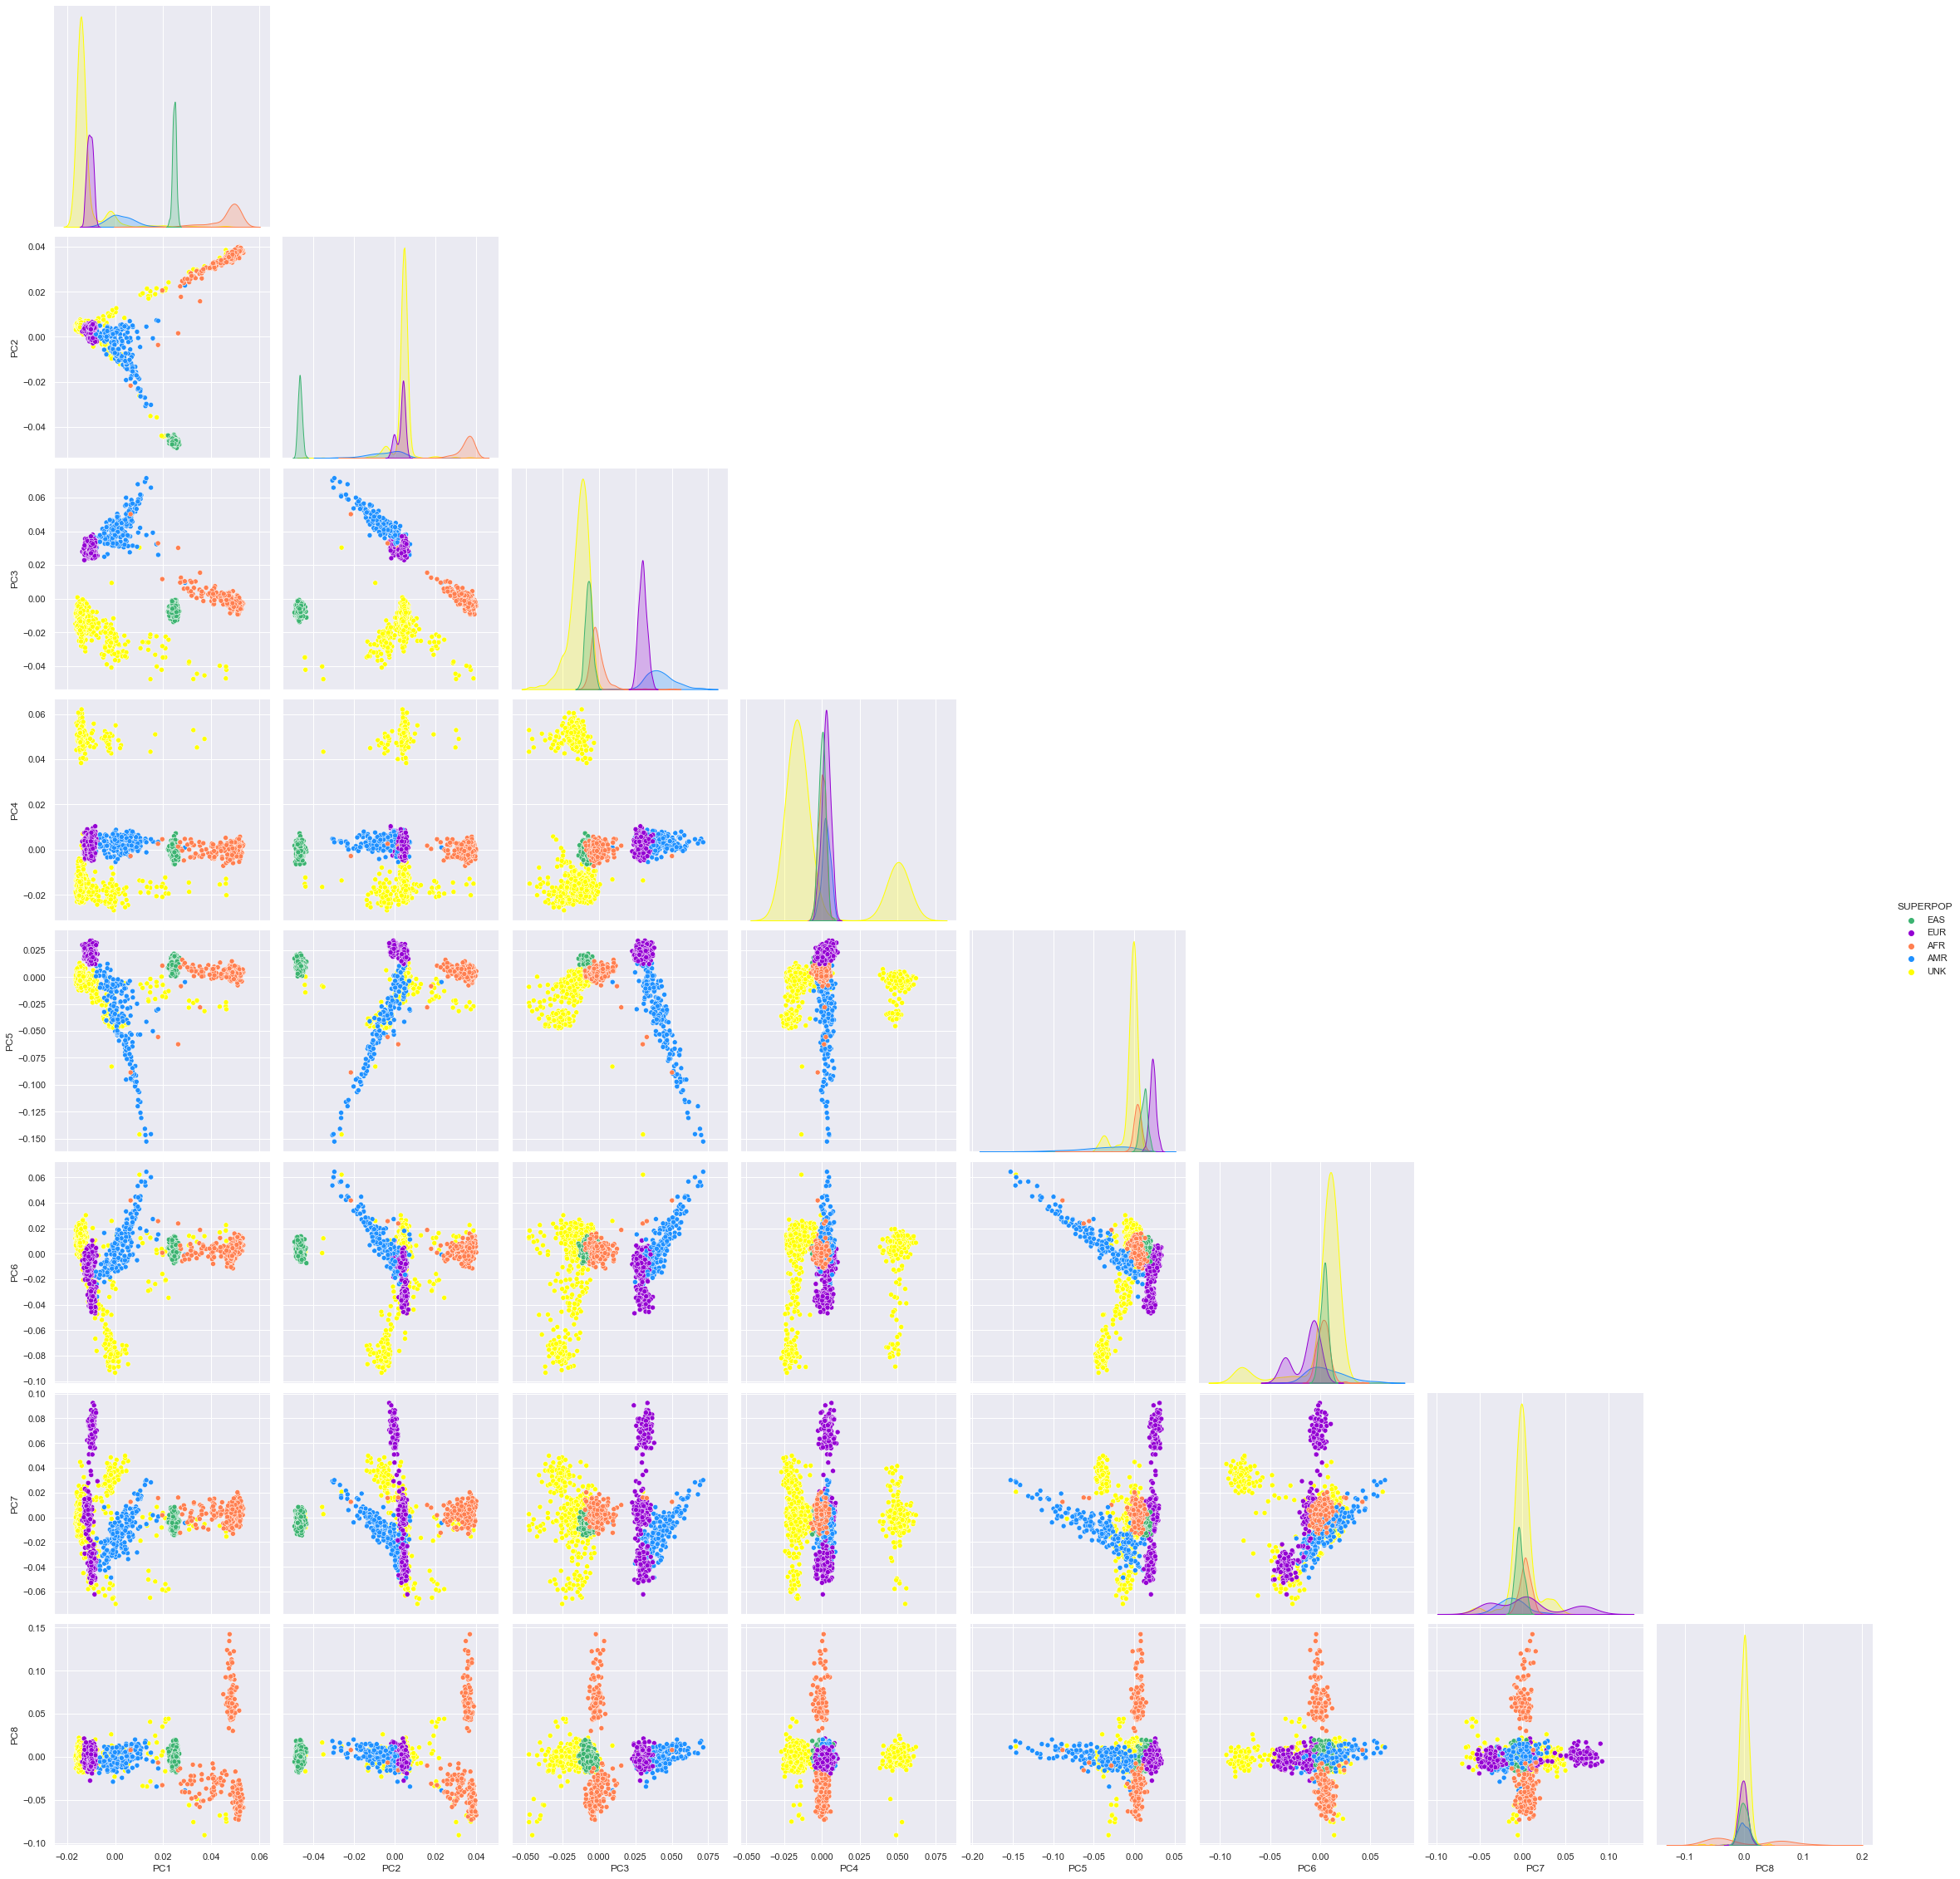

In [4]:
%matplotlib inline
# Plot the differn

#kgponly = joint[joint.SUPERPOP != "UNK"]
kgponly = joint

ax1 = sns.pairplot(data=kgponly, vars=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],
                   hue="SUPERPOP", hue_order=phase1_superpops, palette=phase1_pop_palette, height=4,
                  corner=True)

#def hide_current_axis(*args, **kwds):
#    plt.gca().set_visible(False)

#ax1.map_upper(hide_current_axis)
#ax1.map_diag(hide_current_axis)
#ax1.map_lower(plt.scatter)

ax1.savefig('Figures/PCA-corner-with-UNK.png', bbox_inches='tight')

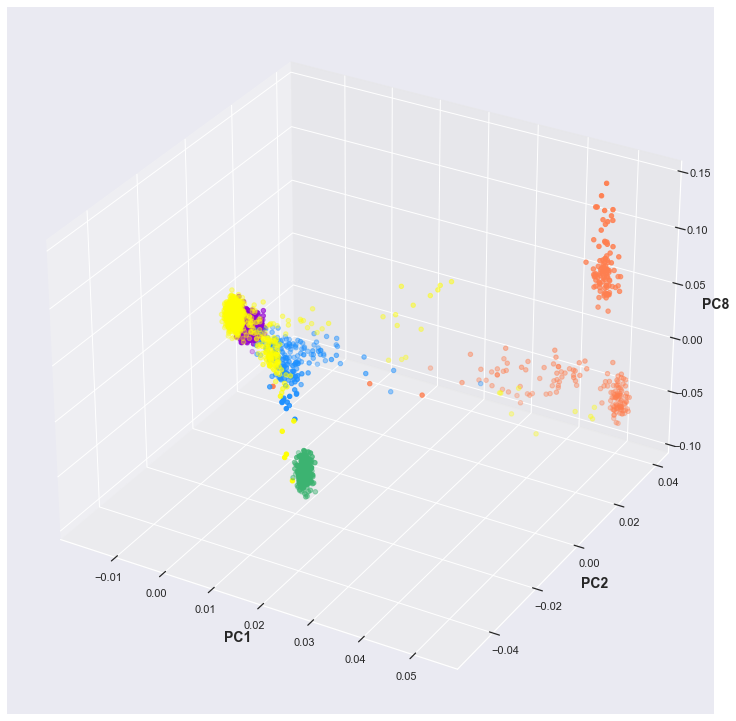

In [5]:
from mpl_toolkits import mplot3d
%matplotlib inline

PCx = "PC1"
PCy = "PC2"
PCz = "PC8"

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

for pop in joint.SUPERPOP.unique():
    axdata = joint[joint.SUPERPOP == pop]
    ax.scatter(axdata[PCx], axdata[PCy], axdata[PCz], c=phase1_pop_palette[pop])

ax.set_xlabel(PCx, fontweight="bold", fontsize=14)
ax.set_ylabel(PCy, fontweight="bold", fontsize=14)
ax.set_zlabel(PCz, fontweight="bold", fontsize=14)

plt.show()

#fig.savefig('Figures/PCA-3D', bbox_inches='tight')

Text(0, 0.5, 'PC2')

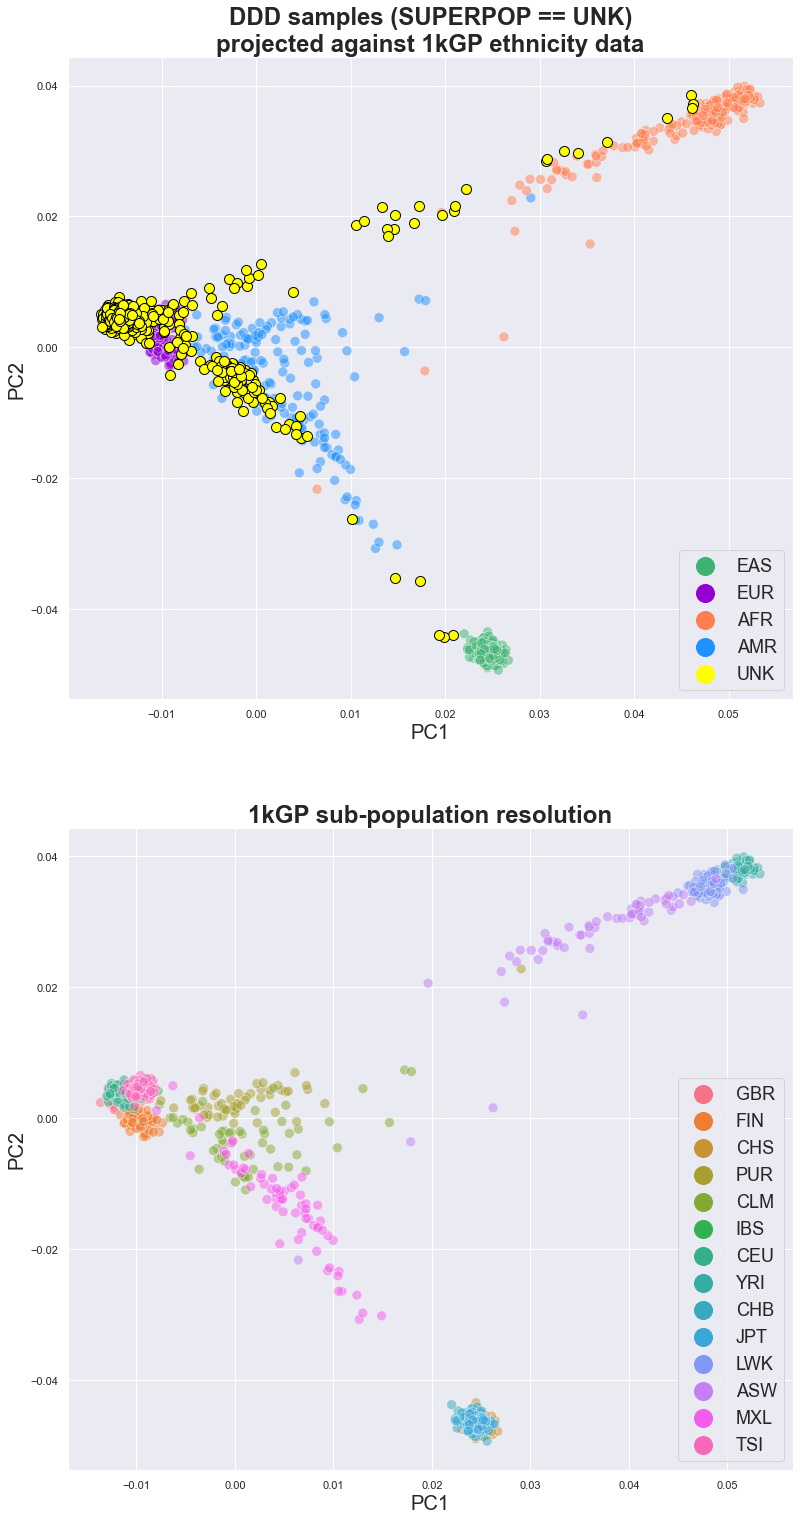

In [6]:
%matplotlib inline

# Plot the PCA values, coloured by the 1kGP superpopulation - ensure that there is good separation of the ethnic groups
f, axes = plt.subplots(2, 1, figsize=(13, 26))

# Plot 1kGP samples and DDD samples (SUPERPOP == "UNK") separately. This ensures that DDD samples are shown on top,
# and can be formatted separately (e.g. different transparency, colours, etc.)
# TODO: Copy the PC version of this where the colour scales have been customised to make them even clearer.
ax1 = sns.scatterplot(data=joint[joint.SUPERPOP!="UNK"], x=PCx, y=PCy, ax=axes[0],
                      s=100, alpha=0.5, hue="SUPERPOP", hue_order=phase1_superpops, palette=phase1_pop_palette)
ax2 = sns.scatterplot(data=joint[joint.SUPERPOP=="UNK"], x=PCx, y=PCy, ax=axes[0],
                      s=100, linewidth=1, edgecolor="black", color="yellow", alpha=1, legend=None)
ax1.legend(loc="lower right", fontsize=18, markerscale=3)
ax2.set_title("DDD samples (SUPERPOP == UNK)\nprojected against 1kGP ethnicity data", fontweight="bold", fontsize=24)
ax2.set_xlabel(PCx, fontsize=20)
ax2.set_ylabel(PCy, fontsize=20)

# Also plot against the more detailed populations, double checking where possible that they cluster appropriately.
# TODO: Maybe manually define a colour scale to make this clearer? 
ax3 = sns.scatterplot(data=joint[joint.SUPERPOP != "UNK"], x=PCx, y=PCy, hue="POPULATION", ax=axes[1], s=100, alpha=0.5)
ax3.legend(loc="lower right", fontsize=18, markerscale=3)
ax3.set_title("1kGP sub-population resolution", fontweight="bold", fontsize=24)
ax3.set_xlabel(PCx, fontsize=20)
ax3.set_ylabel(PCy, fontsize=20)

At 2 Standard Deviations from the mean, of 1238 DDD samples:
	1178 are ok to use
	60 should be excluded


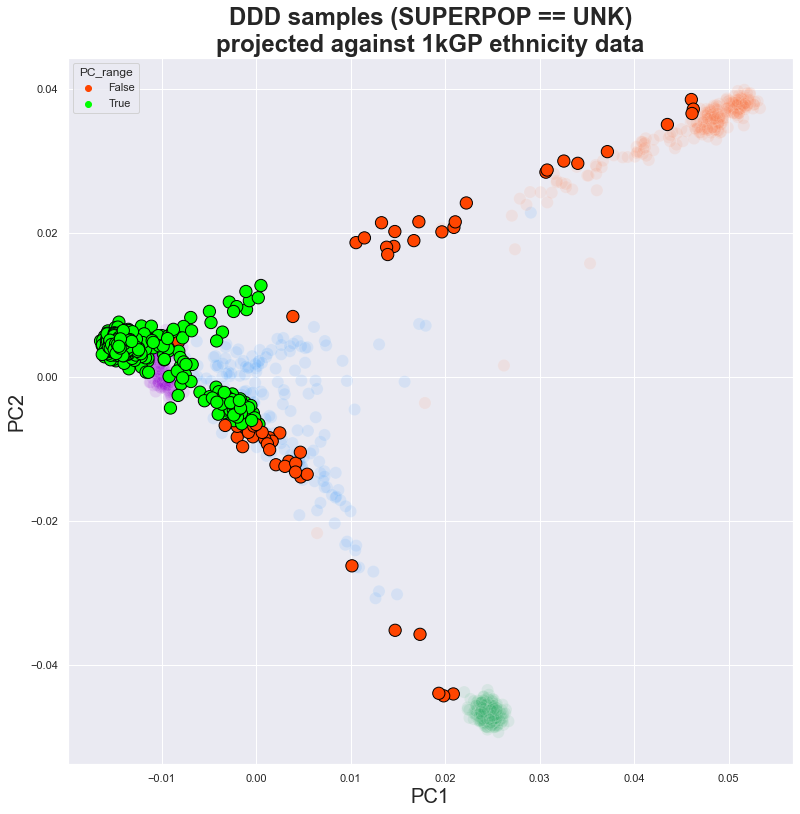

In [7]:
# Cluster samples using the mean and SD - per Ahmed this should be 6 SDs, but that seems to only exclude 2 samples!!
# Might need to be more stringent or look into another method. But why can't I just fine-tune this to capture as close to
# the EUR 1kGP samples as possible? Is there any actual downside to doing this?

# Work out the mean + SD of each PC (for DDD only??), then highlight the samples which are within 6(!!??) SDs
ddd_pcx_mean = joint[joint.SUPERPOP=="UNK"][PCx].mean()
ddd_pcx_sd = joint[joint.SUPERPOP=="UNK"][PCx].std()
ddd_pcy_mean = joint[joint.SUPERPOP=="UNK"][PCy].mean()
ddd_pcy_sd = joint[joint.SUPERPOP=="UNK"][PCy].std()
ddd_pcz_mean = joint[joint.SUPERPOP=="UNK"][PCz].mean()
ddd_pcz_sd = joint[joint.SUPERPOP=="UNK"][PCz].std()
# How many SDs away from the mean are we allowing?
sds=2

# Highlight the samples which fall within the acceptable PC value ranges, and then overall.
joint['PCx_range'] = joint[PCx].between((ddd_pcx_mean - (ddd_pcx_sd * sds)), (ddd_pcx_mean + (ddd_pcx_sd * sds)))
joint['PCy_range'] = joint[PCy].between((ddd_pcy_mean - (ddd_pcy_sd * sds)), (ddd_pcy_mean + (ddd_pcy_sd * sds)))
joint['PCz_range'] = joint[PCz].between((ddd_pcz_mean - (ddd_pcz_sd * sds)), (ddd_pcz_mean + (ddd_pcz_sd * sds)))
joint['PC_range'] = ( joint.PCx_range == True ) & ( joint.PCy_range == True ) & ( joint.PCz_range == True)

# Plot and highlight the colours of the DDD samples by whether they fall into this range or not.
f, axes = plt.subplots(figsize=(13, 13))
binary_palette = {True: "lime", False: "orangered"}
ax1 = sns.scatterplot(data=joint[joint.SUPERPOP!="UNK"], x=PCx, y=PCy, hue="SUPERPOP", s=150,
                      hue_order=phase1_superpops, palette=phase1_pop_palette, alpha=0.1, legend=None)
ax2 = sns.scatterplot(data=joint[joint.SUPERPOP=="UNK"], x=PCx, y=PCy, hue="PC_range", s=150,
                      palette=binary_palette, alpha=1, edgecolor="black")
ax2.set_title("DDD samples (SUPERPOP == UNK)\nprojected against 1kGP ethnicity data", fontweight="bold", fontsize=24)
ax2.set_xlabel(PCx, fontsize=20)
ax2.set_ylabel(PCy, fontsize=20)

print(f"At {sds} Standard Deviations from the mean, of {joint[joint.SUPERPOP=='UNK'].shape[0]} DDD samples:", file=sys.stderr)
print(f"\t{joint[(joint.SUPERPOP=='UNK') & (joint.PC_range == True)].shape[0]} are ok to use", file=sys.stderr)
print(f"\t{joint[(joint.SUPERPOP=='UNK') & (joint.PC_range == False)].shape[0]} should be excluded", file=sys.stderr)

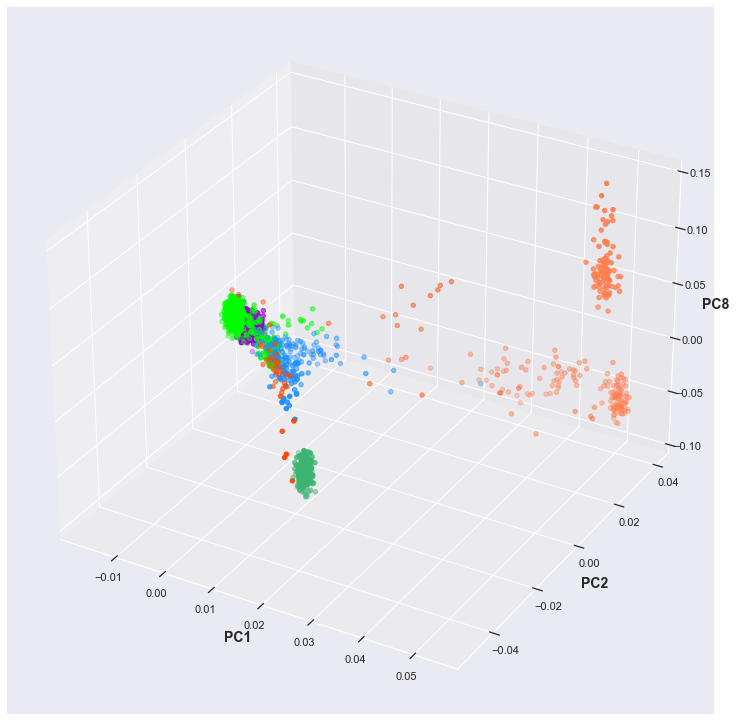

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

for pop in joint.SUPERPOP.unique():
    axdata = joint[joint.SUPERPOP == pop]
    if pop == "UNK":
        passdata=axdata[(axdata.SUPERPOP == "UNK") & (axdata.PC_range == True)]
        ax.scatter(passdata[PCx], passdata[PCy], passdata[PCz], c=binary_palette[1])
        faildata=axdata[(axdata.SUPERPOP == "UNK") & (axdata.PC_range == False)]
        ax.scatter(faildata[PCx], faildata[PCy], faildata[PCz], c=binary_palette[0])
    else:
        ax.scatter(axdata[PCx], axdata[PCy], axdata[PCz], c=phase1_pop_palette[pop])

ax.set_xlabel(PCx, fontweight="bold", fontsize=14)
ax.set_ylabel(PCy, fontweight="bold", fontsize=14)
ax.set_zlabel(PCz, fontweight="bold", fontsize=14)

plt.show()

#fig.savefig('Figures/PCA-3D-filter', bbox_inches='tight')

In [9]:
# Output a list of the samples which are NOT ok by PCA analysis, and which should be dropped
# Then this info can be used to repeat the burden testing with more appropriate case/control matching
# e.g. remove the different ancestry samples from both sets (we don't want to use them at all!)
with open("Processed_data/PCA-samples-to-use.txt", "w") as f:
    for sample in joint[(joint.SUPERPOP == "UNK") & (joint.PC_range == True)].index.tolist():
        f.write(f"{sample}\n")
        
print(f"Wrote {joint[(joint.SUPERPOP == 'UNK') & (joint.PC_range == True)].shape[0]} sample IDs to file", file=sys.stderr)

Wrote 1178 sample IDs to file
